In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('nature-images.jpg')

(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

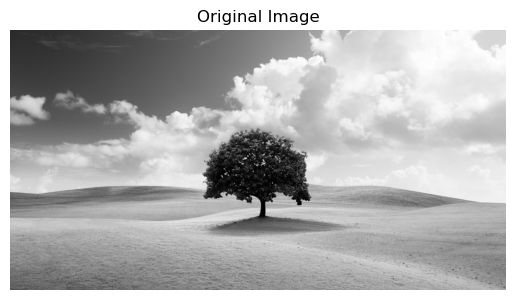

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.title("Original Image")
plt.axis("off")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16608\698332066.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256])


Text(0, 0.5, 'Frequency')

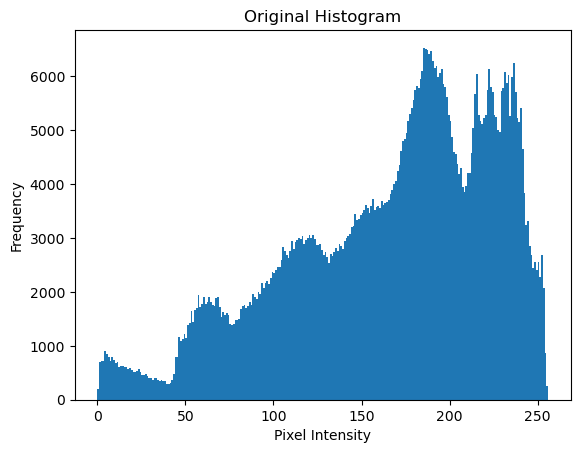

In [9]:

plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

(np.float64(-0.5), np.float64(1199.5), np.float64(629.5), np.float64(-0.5))

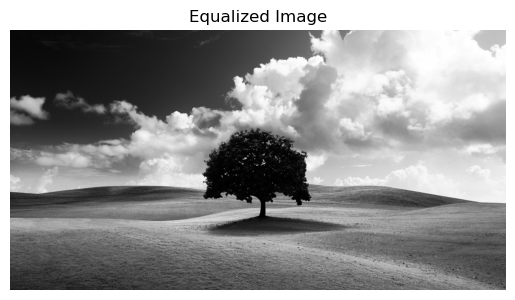

In [10]:
equalized = cv2.equalizeHist(gray)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16608\3361616988.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


Text(0, 0.5, 'Frequency')

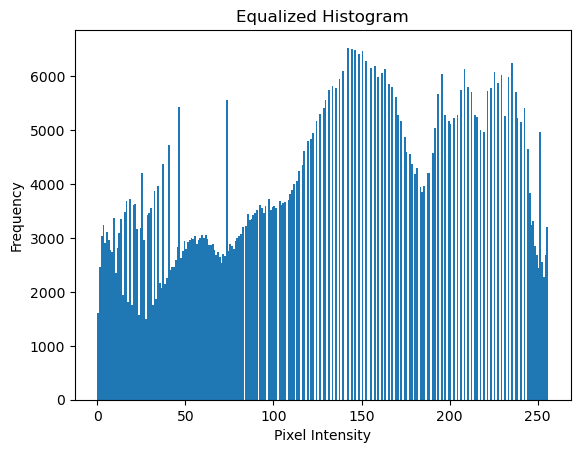

In [11]:
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [12]:
print(gray)

[[ 42  43  43 ... 214 215 215]
 [ 42  43  43 ... 215 215 215]
 [ 42  43  43 ... 215 215 215]
 ...
 [ 93  96  95 ... 155 152 156]
 [ 93  89  87 ... 167 159 164]
 [ 89  81  69 ... 171 163 162]]


In [13]:
print(equalized)

[[  8   8   8 ... 193 195 195]
 [  8   8   8 ... 195 195 195]
 [  8   8   8 ... 195 195 195]
 ...
 [ 35  37  37 ...  95  92  97]
 [ 35  32  31 ... 110 100 106]
 [ 32  28  21 ... 116 105 104]]


In [15]:
def mean_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

In [16]:
noisy_img = gray.copy()
noise = np.random.normal(20, 25, gray.shape).astype(np.uint8)
noisy_img = cv2.add(gray, noise)

In [25]:
mean_filtered = mean_filter(noisy_img,5)

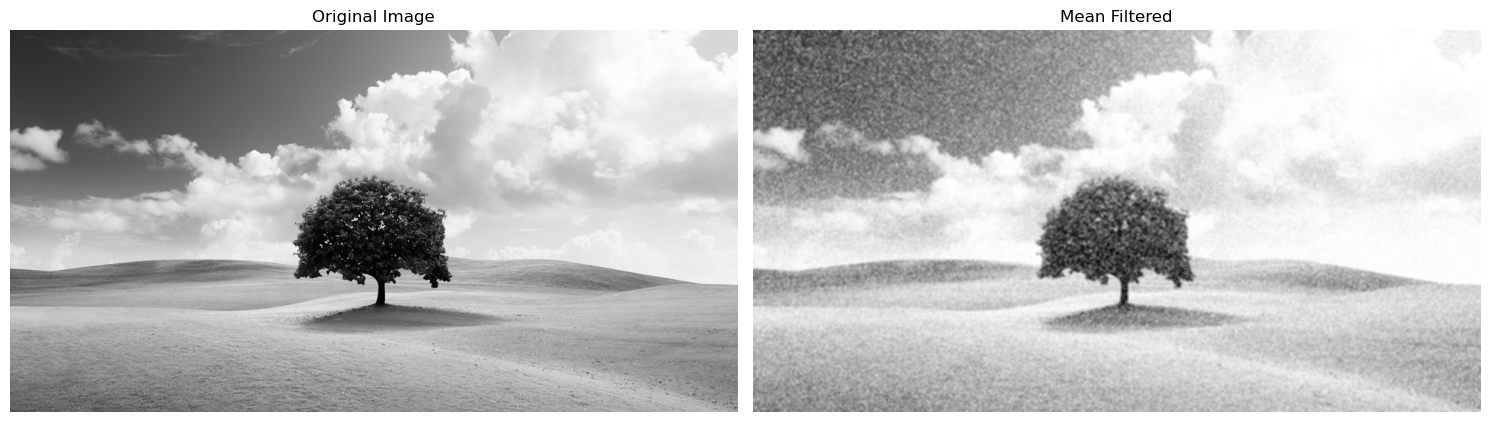

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()

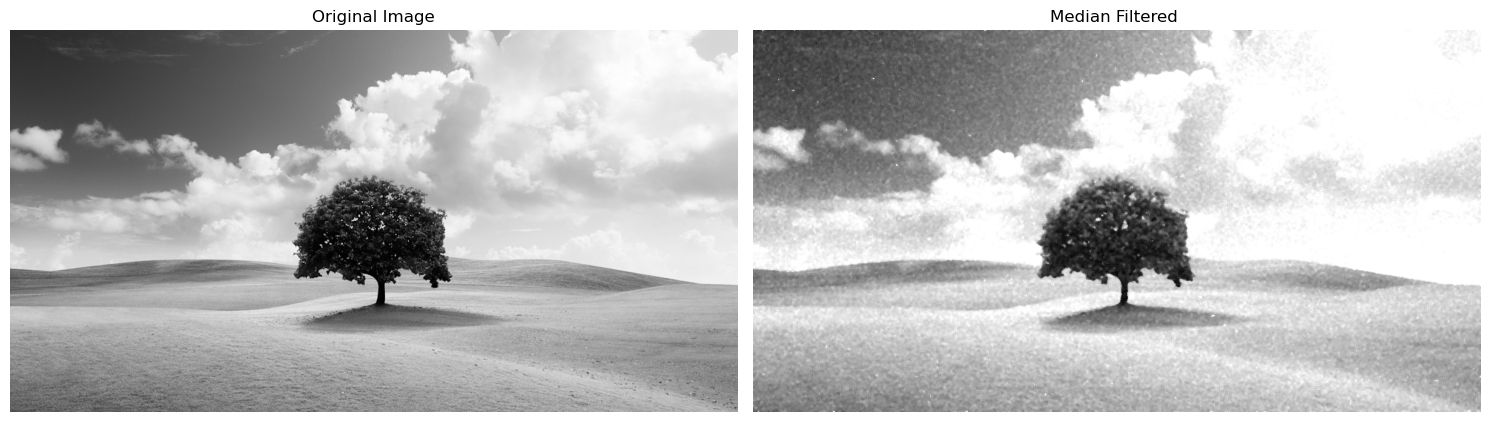

In [24]:
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

median_filtered = median_filter(noisy_img, 5)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered ')
plt.axis('off')

plt.tight_layout()
plt.show()

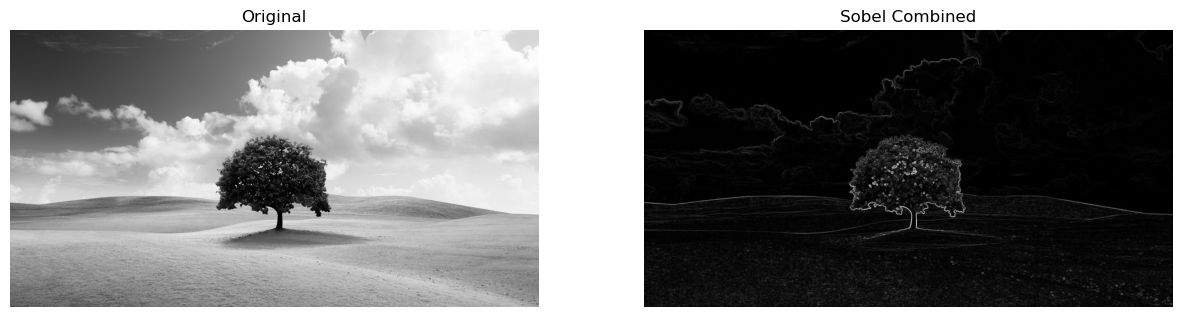

In [29]:

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3) 
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  

sobel_combined = cv2.magnitude(sobelx, sobely)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')
plt.show()

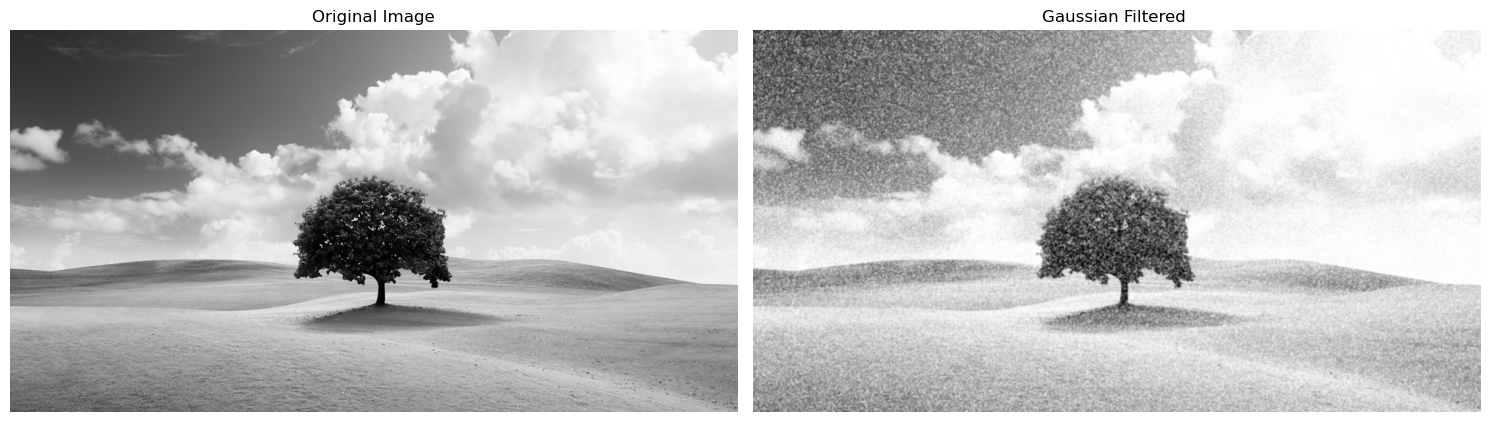

In [30]:
def gaussian_filter(image, kernel_size=5, sigma=1.0):
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return filtered_image

gaussian_filtered = gaussian_filter(noisy_img, 5, 1.0)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered ')
plt.axis('off')

plt.tight_layout()
plt.show()

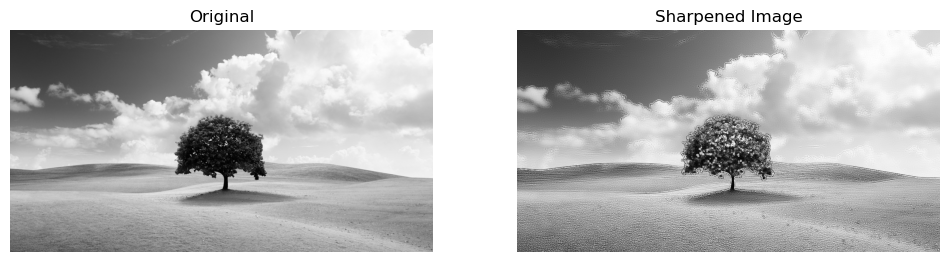

In [35]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)


sharpened = cv2.convertScaleAbs(gray + laplacian)


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original"), plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")
plt.show()

In [37]:
def apply_filter(image, H):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    G = fshift * H
    g = np.fft.ifft2(np.fft.ifftshift(G))
    return np.abs(g)

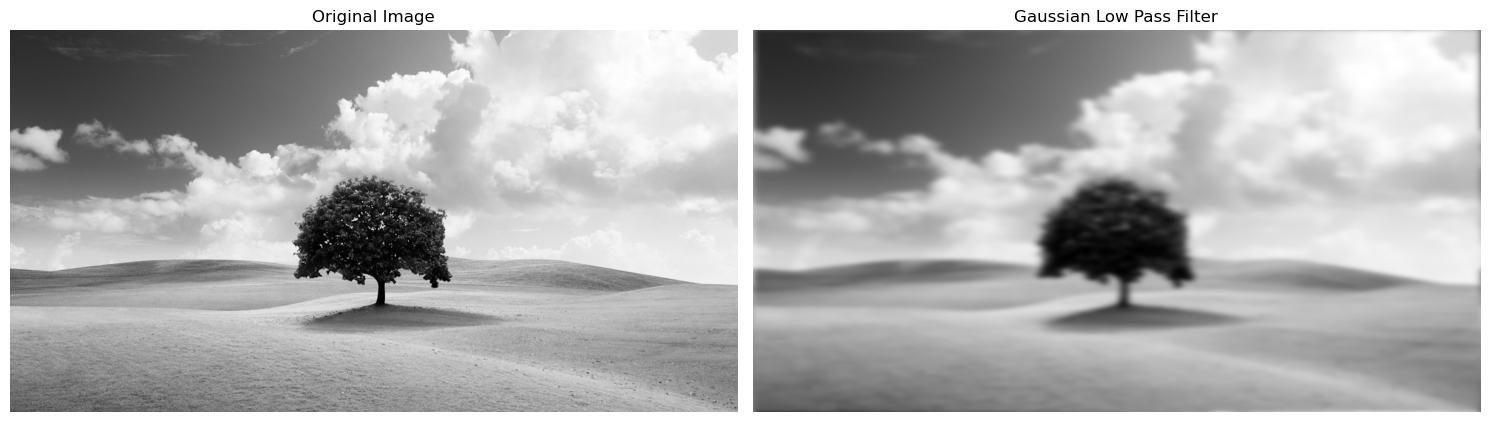

In [41]:
def gaussian_low(shape, cutoff):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D2 = U**2 + V**2
    H = np.exp(-D2 / (2*(cutoff**2)))
    return H

H = gaussian_low(gray.shape, cutoff=30)
filtered = apply_filter(gray, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Gaussian Low Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

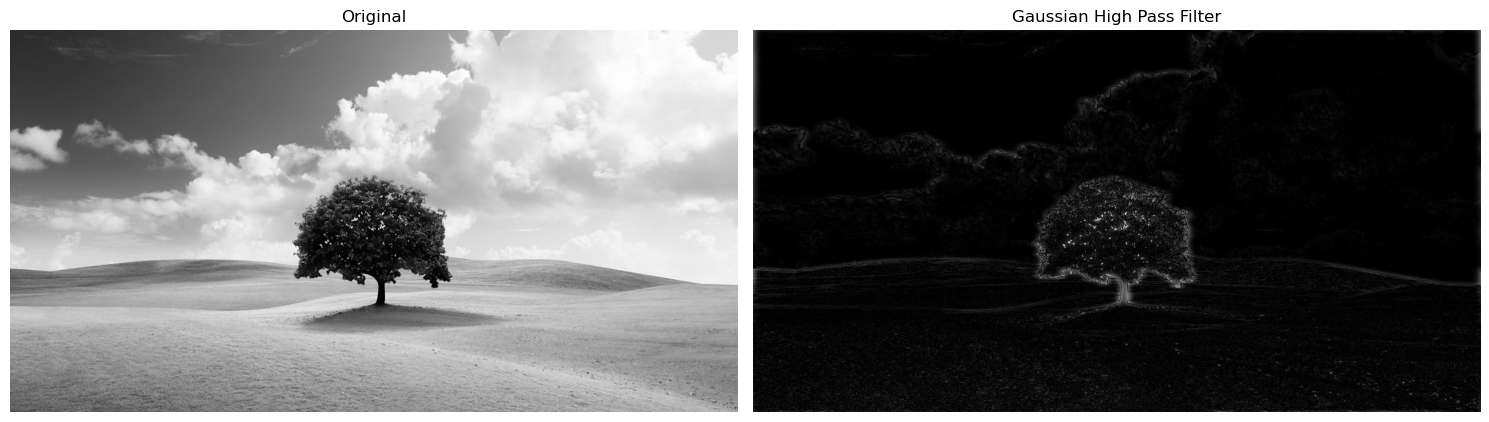

In [43]:
def gaussian_high(shape, cutoff):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D2 = U**2 + V**2
    H = 1 - np.exp(-D2 / (2*(cutoff**2)))
    return H

H = gaussian_high(gray.shape, cutoff=30)
filtered = apply_filter(gray, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Gaussian High Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

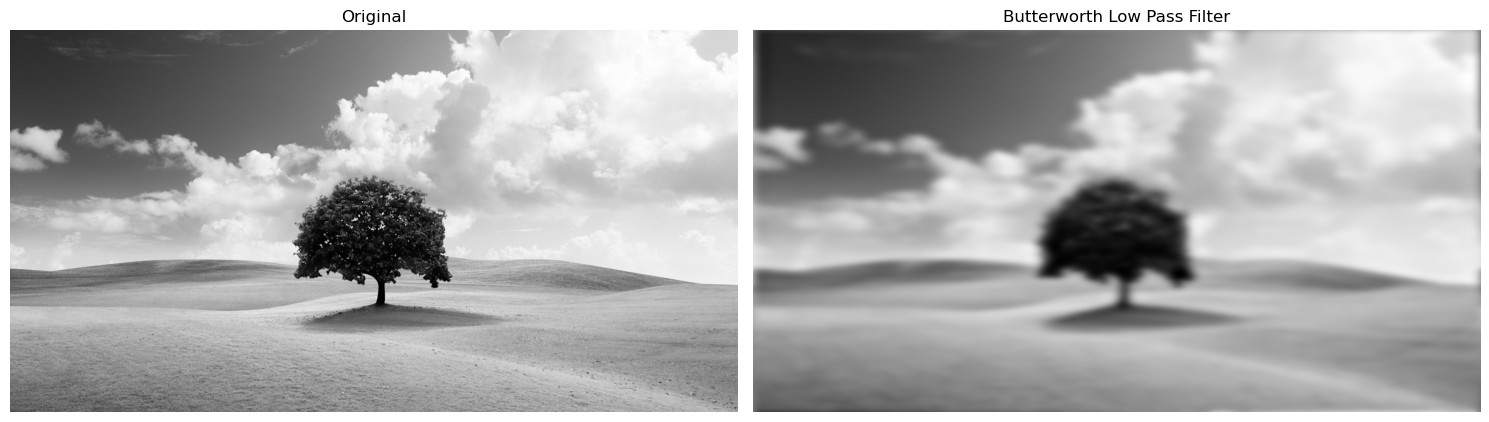

In [45]:
def butterworth_low(shape, cutoff, order=2):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2*order))
    return H

H = butterworth_low(gray.shape, cutoff=30, order=2)
filtered = apply_filter(gray, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Butterworth Low Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

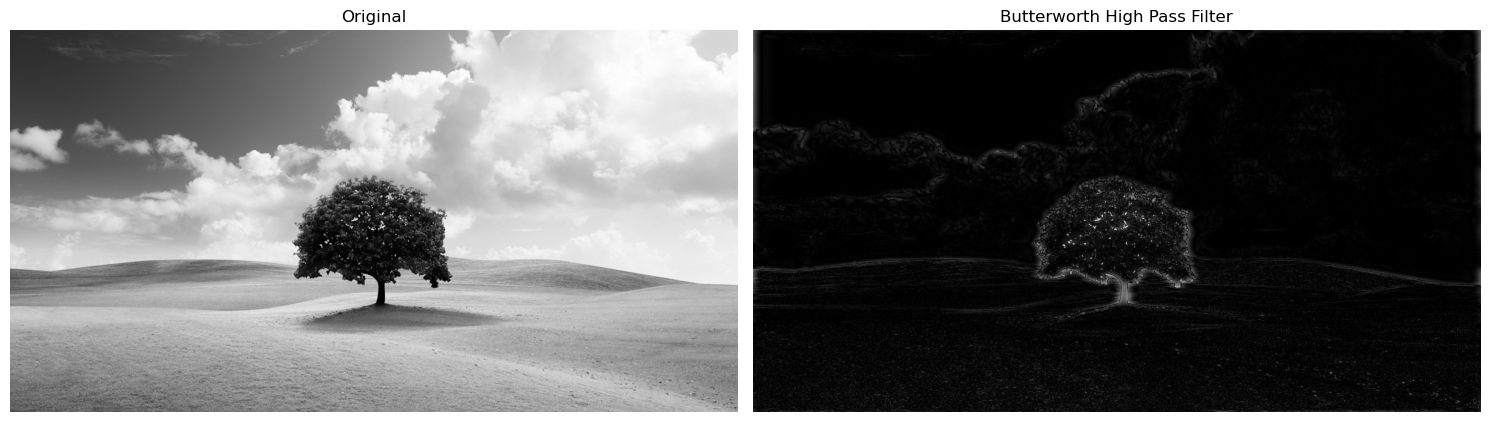

In [49]:
def butterworth_high(shape, cutoff, order=2):
    P, Q = shape
    u = np.arange(P) - P//2
    v = np.arange(Q) - Q//2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 - (1 / (1 + (D / cutoff)**(2*order)))
    return H

H = butterworth_high(gray.shape, cutoff=30, order=2)
filtered = apply_filter(gray, H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered, cmap='gray')
plt.title("Butterworth High Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()